# Building a Naive Bayes model to predict the salary

In [33]:
# Import libaries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [34]:
train=pd.read_csv(r"C:\Users\aravi\OneDrive\Desktop\ExcelR Assignments\12. Naive Bayes\SalaryData_Train.csv")
test=pd.read_csv(r"C:\Users\aravi\OneDrive\Desktop\ExcelR Assignments\12. Naive Bayes\SalaryData_Test.csv")

# Exploratory Data Analysis

In [35]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [36]:
#check for null values
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [37]:
test.head(3)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [38]:
#check for null values
test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [50]:
train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

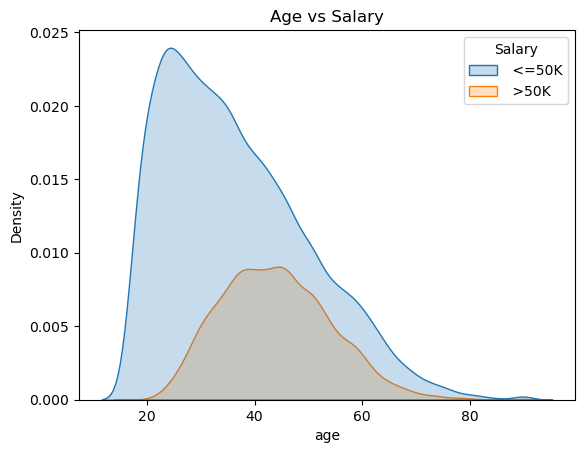

In [70]:
#Age vs Salary Data Representaiton
sns.kdeplot(x='age',hue='Salary', data=train, shade=True)
plt.title('Age vs Salary')
plt.show()

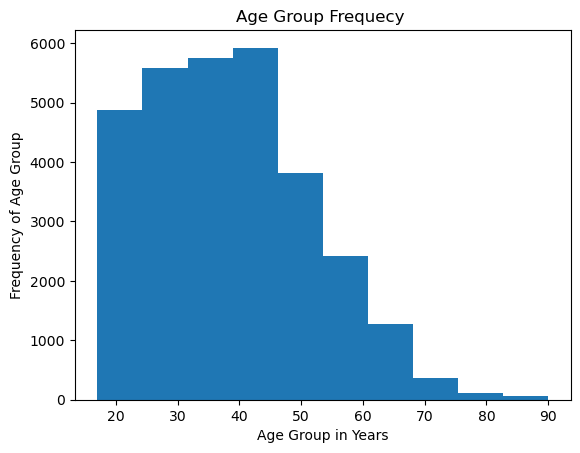

In [69]:
#Exploring the Age group data
plt.hist(train['age'])
plt.xlabel('Age Group in Years')
plt.ylabel('Frequency of Age Group')
plt.title('Age Group Frequecy ')
plt.show()

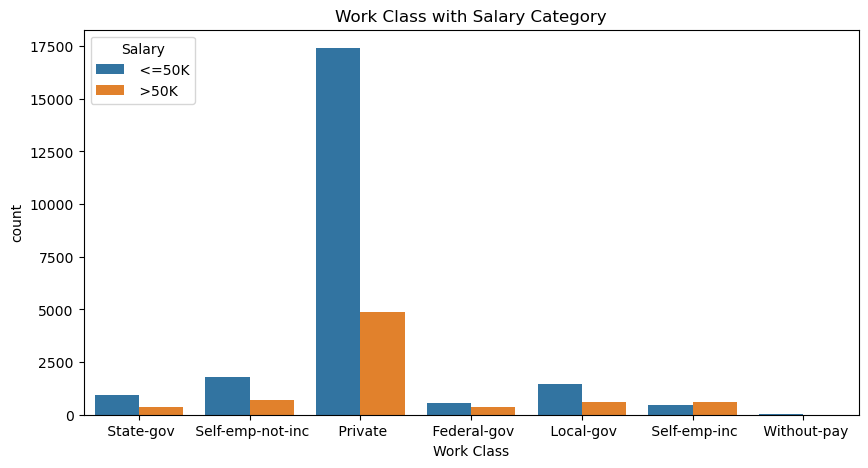

In [71]:
#Exploring the Workclass
fig =plt.figure(figsize=(10,5))
sns.countplot(x='workclass', hue='Salary', data=train)
plt.title('Work Class with Salary Category')
plt.xlabel('Work Class')
plt.show()

# Key Takeaways from the above countplot:

1. The most of the People are belongs to Private Work Class 
2. Most of the people having salary <=50K
3. Privae Work class emplyees are highest number in terms of Salary that is >50k


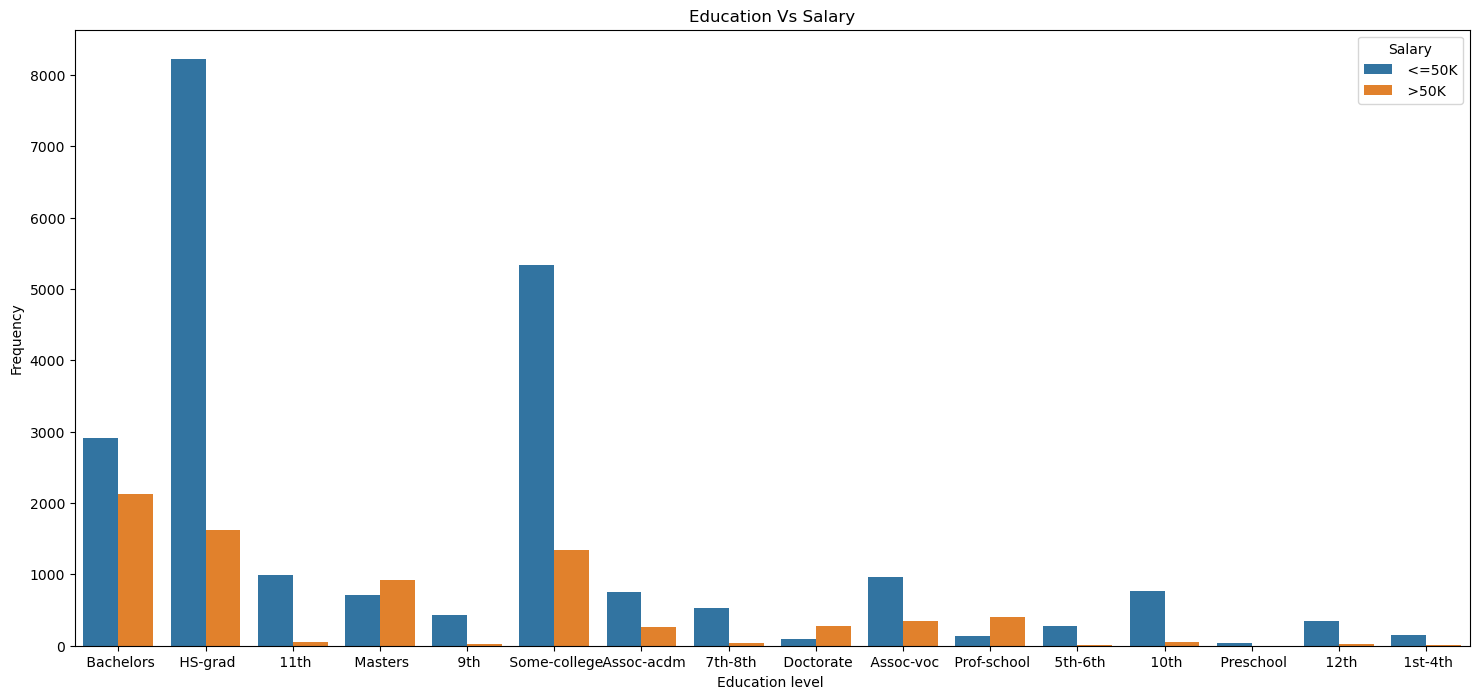

In [72]:
#Exploring Education vs Salary
fig=plt.figure(figsize=(18,8))
sns.countplot(x='education',hue='Salary',data=train)
plt.title('Education Vs Salary')
plt.xlabel('Education level ')
plt.ylabel('Frequency')
plt.show()

# Key Insights from above countplot:
1. The highest number of people having Salary <=50K are HS-grads followed by Some-college grads
2. The highest number of people are from Bachelors whose Salary is >50K 

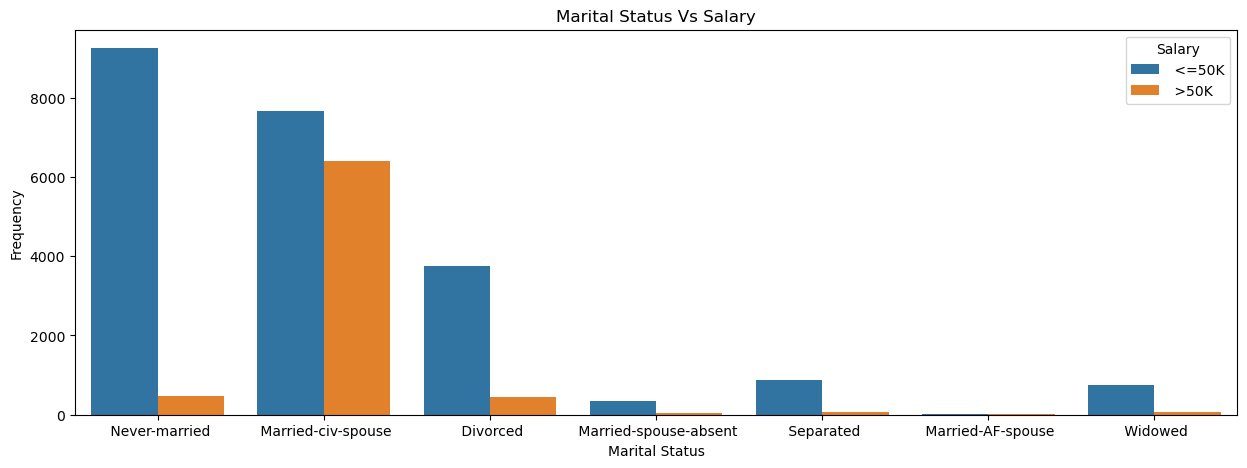

In [75]:
#Exploring Education vs Salary
fig=plt.figure(figsize=(15,5))
sns.countplot(x='maritalstatus',hue='Salary',data=train)
plt.title('Marital Status Vs Salary')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.show()

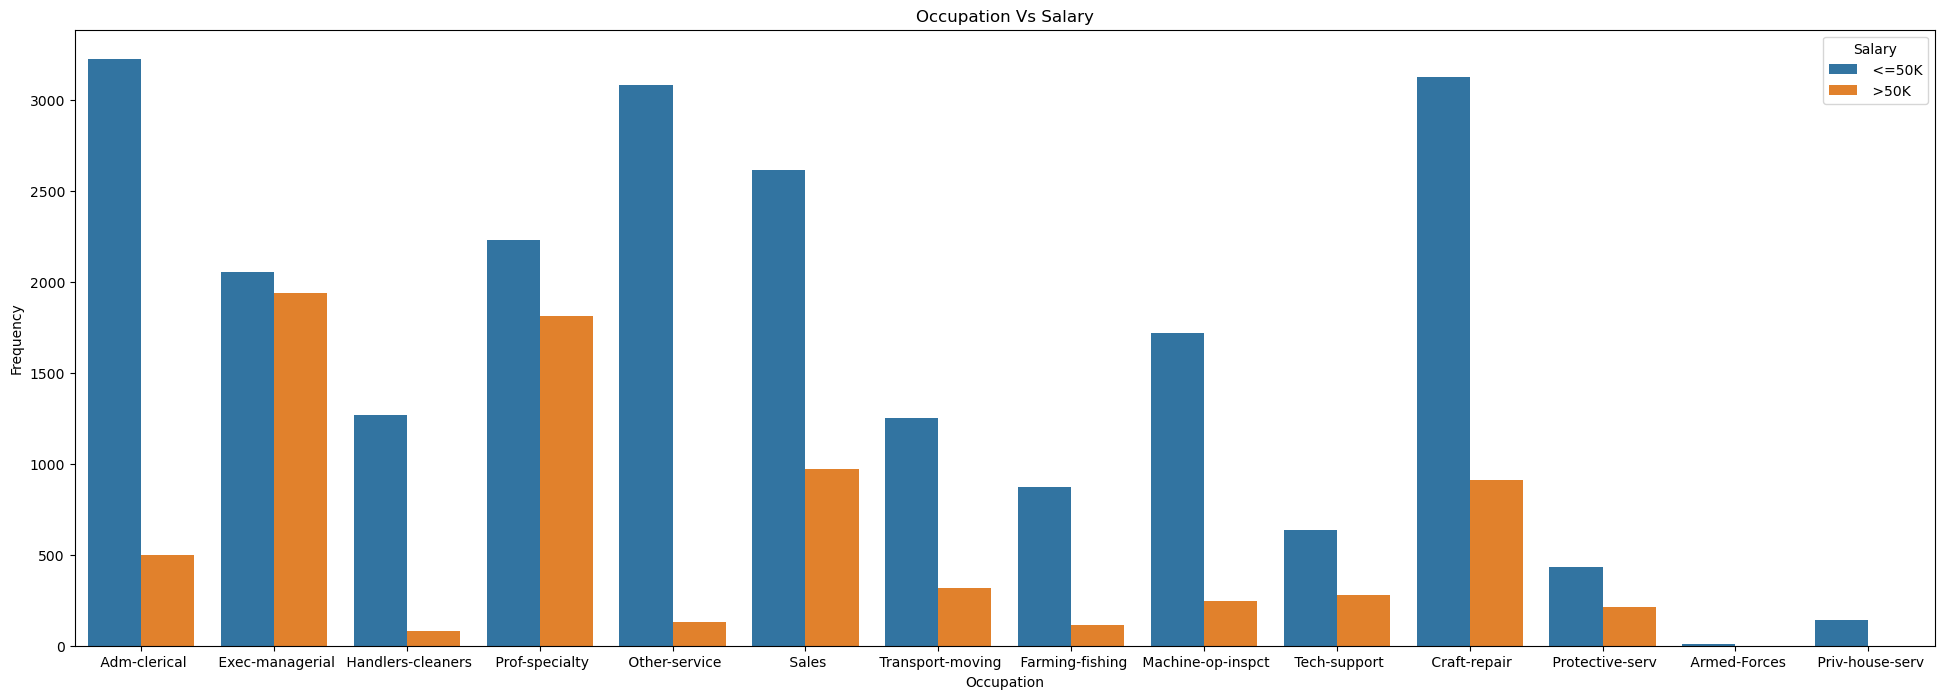

In [77]:
#Occupation vs Salary
fig=plt.figure(figsize=(24,8))
sns.countplot(x='occupation',hue='Salary',data=train)
plt.title('Occupation Vs Salary')
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.show()

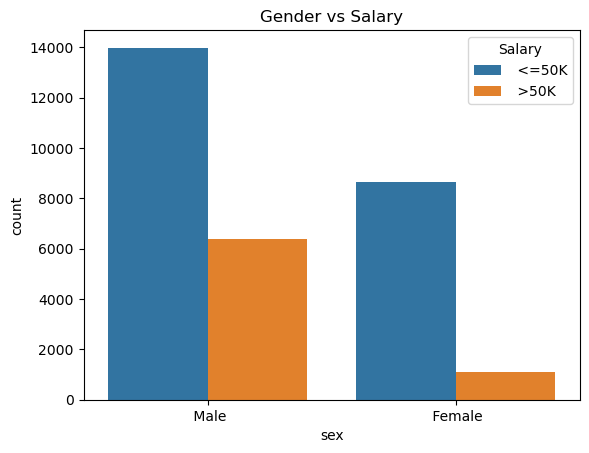

In [78]:
#Exploring Gender Vs Salary
sns.countplot(x='sex', hue='Salary', data=train)
plt.title('Gender vs Salary')
plt.show()

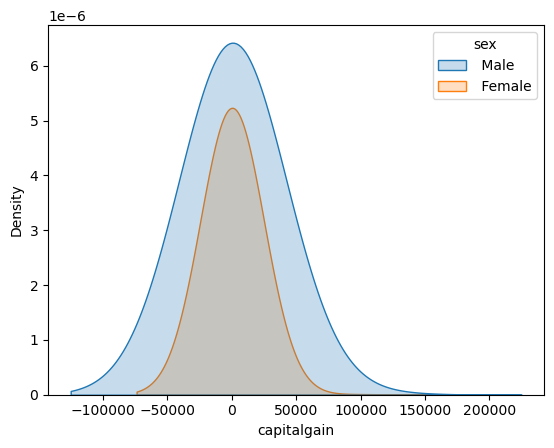

In [79]:
# Exploring CapitalGain Vs Gender
sns.kdeplot(x=train['capitalgain'], hue=train['sex'], shade=True, bw_method=5)
plt.show()

## Defining x,y variables for training and testing data

In [40]:
x_train=train.iloc[:,0:-1]

In [42]:
y_train=train.iloc[:,-1]

In [43]:
x_test=test.iloc[:,0:-1]
y_test=test.iloc[:,-1]

In [44]:
# Encoding categorical variables for X variable
from sklearn.preprocessing import LabelEncoder
x_train=x_train.apply(LabelEncoder().fit_transform)
x_test=x_test.apply(LabelEncoder().fit_transform)

# Building the model on training data set 

In [45]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(x_train, y_train) 

GaussianNB()

In [80]:
# Y Predictions
y_pred = gnb.predict(x_test) 

In [47]:
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' >50K', ' >50K'],
      dtype='<U6')

In [48]:
# Comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Accuracy of the testing dataset(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Accuracy of the testing dataset(in %): 81.46746347941567


## Conclusion: 

**We have successfully build the Naive Bayes model for predicting the salary, the model accuracy is 81.46%**